In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.random.seed(42)

In [2]:
#Parameters
S0 = 100      # initial price
mu = 0.10     # expected annual return
sigma = 0.20  # volatility
days = 252    # trading days in a year
dt = 1/days

Z = np.random.normal(0,1,days)
prices = np.zeros(days)
prices [0] = S0

for t in range(1, days):
    prices[t] = prices[t-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*Z[t])

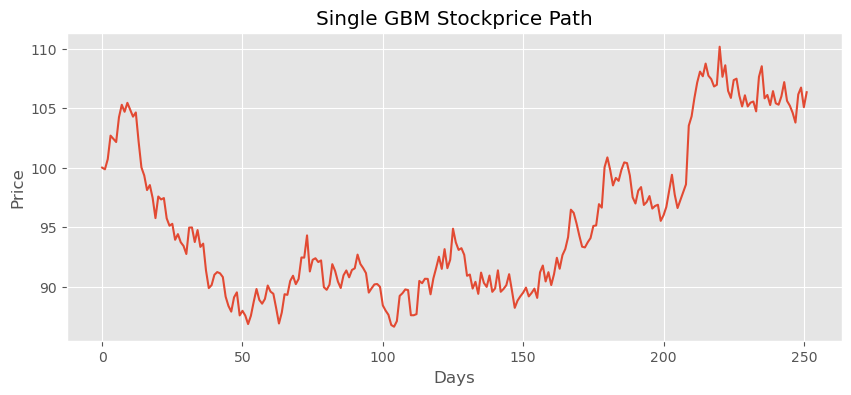

In [3]:
plt.figure(figsize =(10,4))
plt.plot(prices)
plt.title("Single GBM Stockprice Path")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [5]:
#Parameters
S0 = 100
mu = 0.10
sigma = 0.20
days = 252
dt = 1 / days
paths = 1000 

Z = np.random.normal(0, 1,(paths,days))
increments = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
log_returns = increments.cumsum(axis=1)
prices = S0 * np.exp(log_returns)

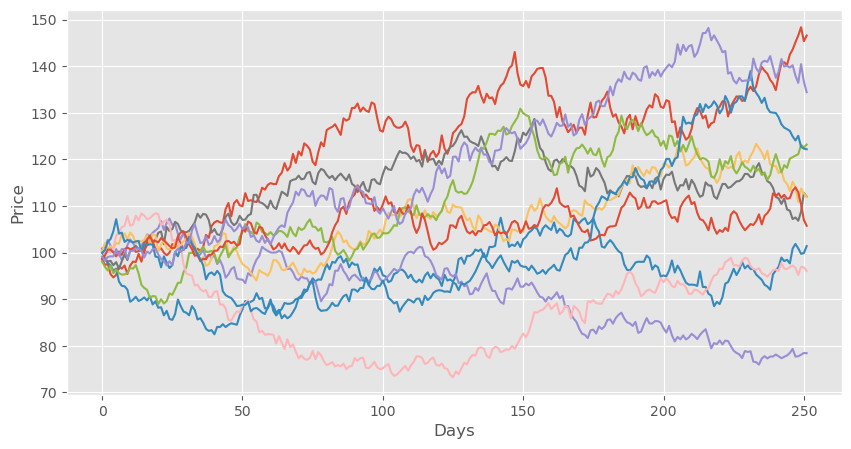

In [6]:
plt.figure(figsize = (10,5))
for i in range (10):
    plt.plot(prices[i])
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()    
    

Expected final return (mean): 0.0962 (9.62%)
VaR (95%): 0.2283 (22.83%) — meaning a 22.83% loss at the 5th percentile
CVaR (95%): 0.2831 (28.31%) — average loss in the worst 5% outcomes


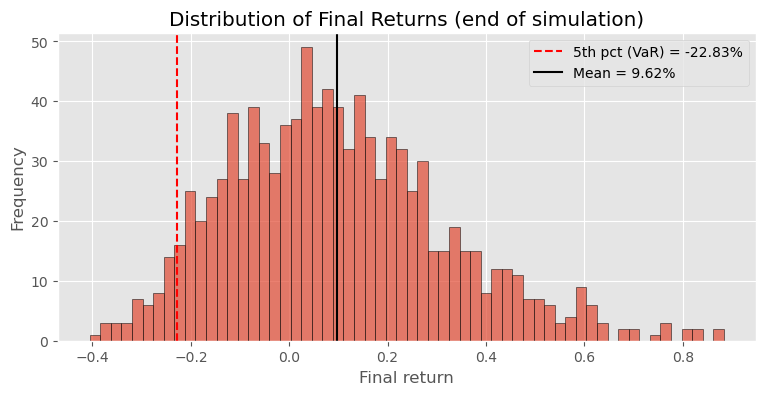

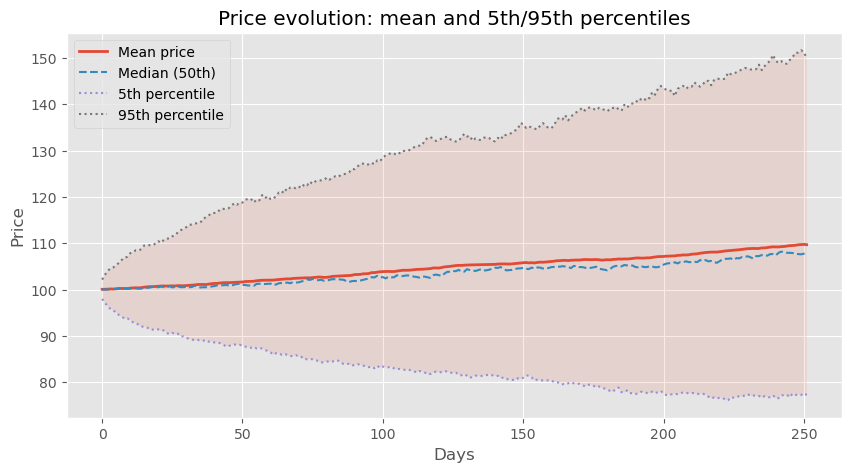

In [7]:
import numpy as np
import matplotlib.pyplot as plt


paths, days = prices.shape
S0 = prices[:,0].mean()  # should be same as S0 variable, but safe

# Daily simple returns (paths x (days-1))
daily_returns = prices[:,1:] / prices[:,:-1] - 1

# Final (T) simple returns per path
final_returns = prices[:,-1] / S0 - 1

# Risk metrics (95% confidence: alpha = 0.05)
alpha = 0.05
percentile_val = np.percentile(final_returns, 100 * alpha)   # e.g., 5th percentile
VaR_95 = -percentile_val                                      # report as positive loss
CVaR_95 = -final_returns[final_returns <= percentile_val].mean()

expected_return = final_returns.mean()


print(f"Expected final return (mean): {expected_return:.4f} ({expected_return*100:.2f}%)")
print(f"VaR (95%): {VaR_95:.4f} ({VaR_95*100:.2f}%) — meaning a {VaR_95*100:.2f}% loss at the 5th percentile")
print(f"CVaR (95%): {CVaR_95:.4f} ({CVaR_95*100:.2f}%) — average loss in the worst 5% outcomes")


plt.figure(figsize=(9,4))
plt.hist(final_returns, bins=60, edgecolor='k', alpha=0.7)
plt.axvline(percentile_val, color='r', linestyle='--', label=f'5th pct (VaR) = {percentile_val:.2%}')
plt.axvline(final_returns.mean(), color='black', linestyle='-', label=f'Mean = {final_returns.mean():.2%}')
plt.title('Distribution of Final Returns (end of simulation)')
plt.xlabel('Final return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


median = np.percentile(prices, 50, axis=0)
p5 = np.percentile(prices, 5, axis=0)
p95 = np.percentile(prices, 95, axis=0)
mean_price = prices.mean(axis=0)

plt.figure(figsize=(10,5))
plt.plot(mean_price, label='Mean price', linewidth=2)
plt.plot(median, label='Median (50th)', linestyle='--')
plt.plot(p5, label='5th percentile', linestyle=':')
plt.plot(p95, label='95th percentile', linestyle=':')
plt.fill_between(range(days), p5, p95, alpha=0.12)
plt.title('Price evolution: mean and 5th/95th percentiles')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [8]:
print("----- Simulation Summary -----\n")
print(f"Expected Final Return: {expected_return*100:.2f}%")
print(f"VaR (95%): {VaR_95*100:.2f}%")
print(f"CVaR (95%): {CVaR_95*100:.2f}%")


----- Simulation Summary -----

Expected Final Return: 9.62%
VaR (95%): 22.83%
CVaR (95%): 28.31%


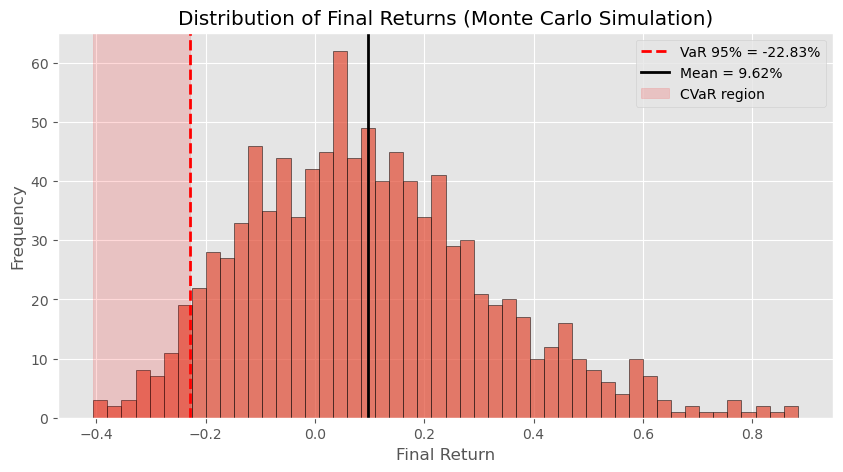

In [9]:
plt.figure(figsize=(10,5))
plt.hist(final_returns, bins=50, edgecolor='black', alpha=0.7)


plt.axvline(percentile_val, color='red', linestyle='--', linewidth=2, 
            label=f'VaR 95% = {percentile_val:.2%}')


plt.axvline(final_returns.mean(), color='black', linestyle='-', linewidth=2, 
            label=f'Mean = {final_returns.mean():.2%}')


cvar_region = final_returns[final_returns <= percentile_val]
plt.axvspan(cvar_region.min(), percentile_val, color='red', alpha=0.15, 
            label=f'CVaR region')

plt.title("Distribution of Final Returns (Monte Carlo Simulation)")
plt.xlabel("Final Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


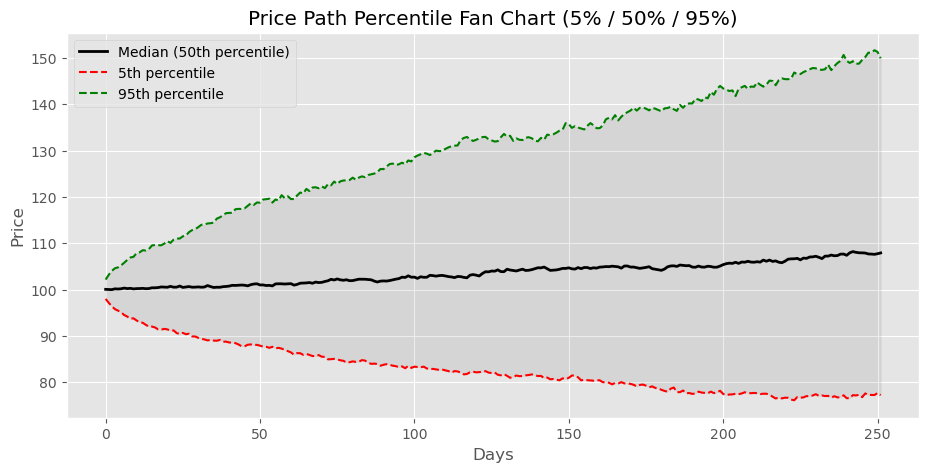

In [10]:

p5  = np.percentile(prices, 5, axis=0)
p50 = np.percentile(prices, 50, axis=0)
p95 = np.percentile(prices, 95, axis=0)

plt.figure(figsize=(11,5))

plt.plot(p50, label='Median (50th percentile)', color='black', linewidth=2)
plt.plot(p5, label='5th percentile', linestyle='--', color='red')
plt.plot(p95, label='95th percentile', linestyle='--', color='green')


plt.fill_between(range(len(p50)), p5, p95, color='gray', alpha=0.15)

plt.title("Price Path Percentile Fan Chart (5% / 50% / 95%)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


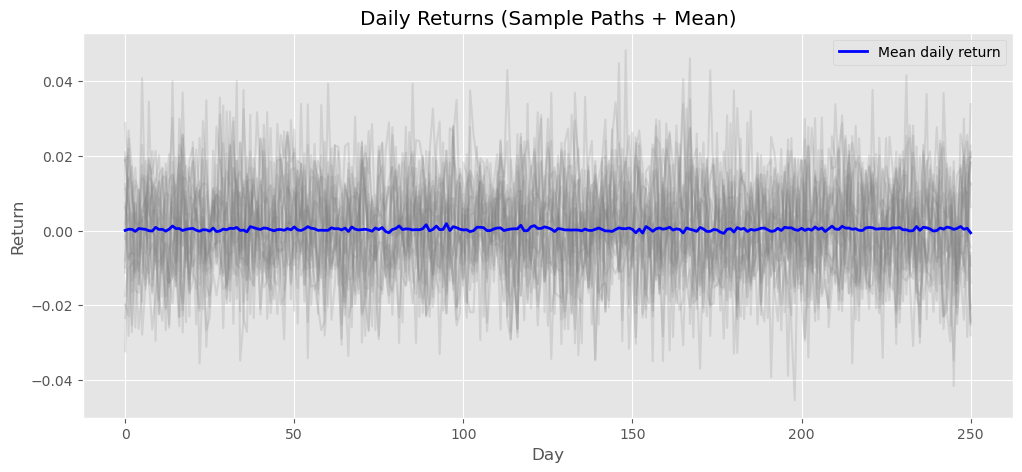

In [11]:

mean_daily = daily_returns.mean(axis=0)

plt.figure(figsize=(12,5))


for i in np.random.choice(len(daily_returns), 20, replace=False):
    plt.plot(daily_returns[i], color='gray', alpha=0.2)


plt.plot(mean_daily, color='blue', linewidth=2, label='Mean daily return')

plt.title("Daily Returns (Sample Paths + Mean)")
plt.xlabel("Day")
plt.ylabel("Return")
plt.legend()
plt.show()


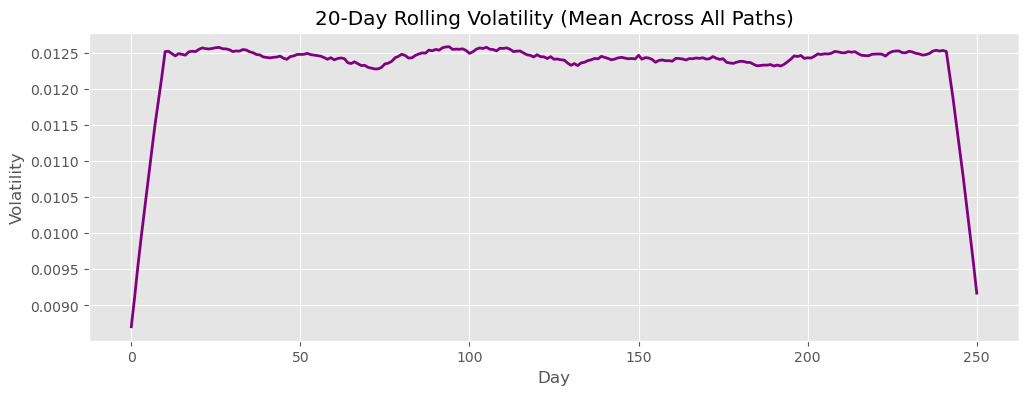

In [12]:
window = 20  # 20-day rolling window


roll_vol = np.sqrt(
    (daily_returns**2).reshape(paths, -1)
)


kernel = np.ones(window) / window


rolling_vol = np.apply_along_axis(
    lambda x: np.sqrt(np.convolve(x**2, kernel, mode='same')),
    axis=1,
    arr=daily_returns
)


mean_rolling_vol = rolling_vol.mean(axis=0)

plt.figure(figsize=(12,4))
plt.plot(mean_rolling_vol, color='purple', linewidth=2)
plt.title("20-Day Rolling Volatility (Mean Across All Paths)")
plt.xlabel("Day")
plt.ylabel("Volatility")
plt.show()
